<a href="https://colab.research.google.com/github/MohannadNa/Project/blob/main/Prediction_of_the_Fuel_Efficiency_of_a_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [ ]:
dataset = pd.read_csv('/content/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

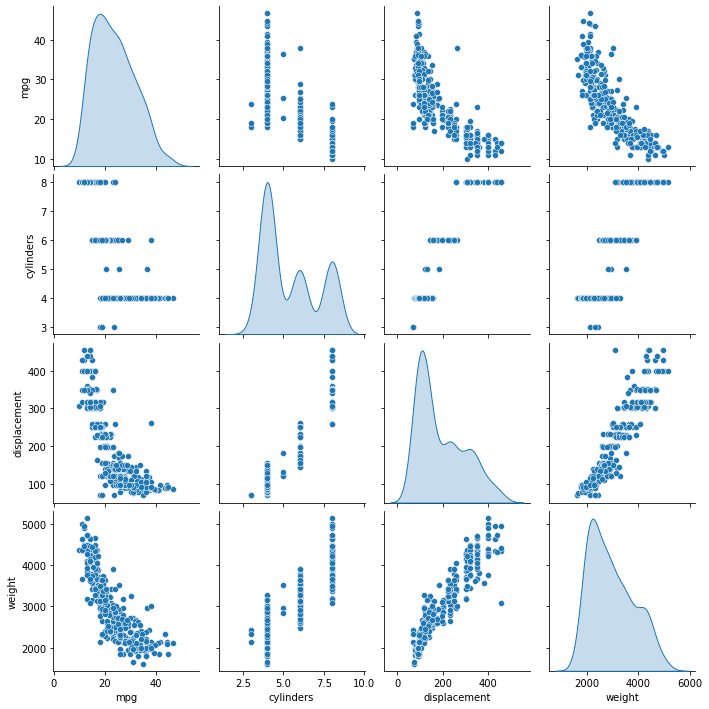

In [ ]:
sns.pairplot(train_dataset[["mpg", "cylinders", "displacement", "weight"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mpg,318.0,23.590566,7.913617,10.0,17.125,22.75,29.00,46.6
cylinders,318.0,5.427673,1.682941,3.0,4.000,4.00,6.00,8.0
displacement,318.0,193.061321,103.812742,70.0,100.250,151.00,259.50,455.0
weight,318.0,2963.823899,844.749805,1613.0,2219.250,2792.50,3571.25,5140.0
acceleration,318.0,15.595912,2.796282,8.0,13.900,15.50,17.30,24.8
model year,318.0,75.946541,3.705266,70.0,73.000,76.00,79.00,82.0
origin,318.0,1.553459,0.799430,1.0,1.000,1.00,2.00,3.0


<BarContainer object of 398 artists>

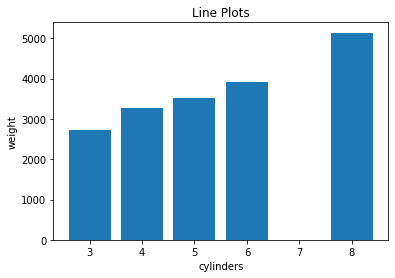

In [ ]:
x = dataset['cylinders']

y = dataset['weight']

plt.xlabel('cylinders')

plt.ylabel('weight')

plt.title('Line Plots')



plt.bar( x, y )

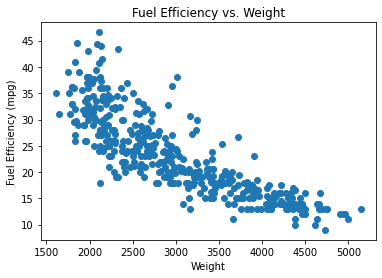

In [ ]:
plt.scatter(dataset["weight"], dataset["mpg"])
plt.xlabel("Weight")
plt.ylabel("Fuel Efficiency (mpg)")
plt.title("Fuel Efficiency vs. Weight")
plt.show()

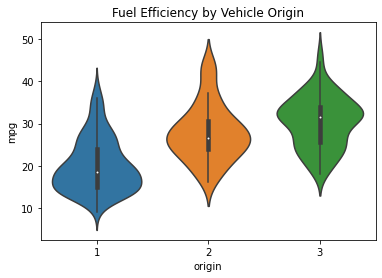

In [ ]:
sns.violinplot(x="origin", y="mpg", data=dataset)


plt.title("Fuel Efficiency by Vehicle Origin")


plt.show()

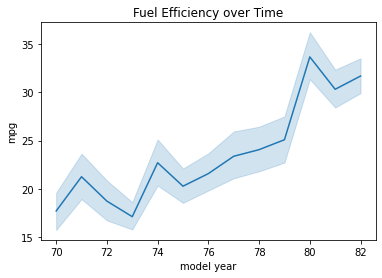

In [ ]:

sns.lineplot(x="model year", y="mpg", data=dataset)


plt.title("Fuel Efficiency over Time")


plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Define the input and output variables
X = dataset[["horsepower", "weight"]]
y = dataset["mpg"]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 14.84781602919703
R-squared: 0.7238460460908385


In [ ]:

from sklearn.neighbors import KNeighborsRegressor



# Define the input and output variables
X = dataset[["horsepower", "weight", "displacement"]]
y = dataset["mpg"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 12.489455000000001
R-squared: 0.7677091113172237
